In [1]:
# importing the required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Reading the dataset 
df = pd.read_csv(r'dataset.csv')
df.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155


In [3]:
df.shape

(43718, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

In [5]:
df.isnull().sum()

order_id                      0
customer_number               0
transaction_date              0
description                   0
total_qty                     0
net_total                     0
loyalty_amount                0
loyalty_points                0
discount_amount               0
customer_group                0
territory                     0
delivery_date                 0
delivery_window_end_time      0
delivery_window_start_time    0
set_warehouse                 0
duka_latitude                 0
duka_longitude                0
dtype: int64

In [6]:
df.describe()

,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,duka_latitude,duka_longitude
count,43718.000000,4.371800e+04,43718.0,43718.0,43718.000000,43718.000000,43718.000000
mean,6.603367,1.046441e+04,0.0,0.0,178.727343,-1.218860,36.898733
std,13.364121,3.023364e+04,0.0,0.0,496.646786,1.066350,1.130535
min,1.000000,1.810300e+02,0.0,0.0,0.000000,-4.289833,34.455751
25%,2.000000,2.556318e+03,0.0,0.0,35.600000,-1.314316,36.715435
50%,4.000000,4.864660e+03,0.0,0.0,72.700000,-1.218128,36.905558
75%,7.000000,9.484540e+03,0.0,0.0,155.250000,-0.628575,37.023091
max,500.000000,1.379599e+06,0.0,0.0,20231.250000,0.885170,40.121896


In [7]:
df.dtypes

order_id                       object
customer_number                object
transaction_date               object
description                    object
total_qty                       int64
net_total                     float64
loyalty_amount                  int64
loyalty_points                  int64
discount_amount               float64
customer_group                 object
territory                      object
delivery_date                  object
delivery_window_end_time       object
delivery_window_start_time     object
set_warehouse                  object
duka_latitude                 float64
duka_longitude                float64
dtype: object

I am going to change the delivery_date, and the transaction_date into the correct datatype which is date 

In [8]:
# changing the datatypes of the transaction date and the delivery date
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format = '%d/%m/%Y') 
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format = '%d/%m/%Y')

In [9]:
df.dtypes

order_id                              object
customer_number                       object
transaction_date              datetime64[ns]
description                           object
total_qty                              int64
net_total                            float64
loyalty_amount                         int64
loyalty_points                         int64
discount_amount                      float64
customer_group                        object
territory                             object
delivery_date                 datetime64[ns]
delivery_window_end_time              object
delivery_window_start_time            object
set_warehouse                         object
duka_latitude                        float64
duka_longitude                       float64
dtype: object

In [10]:
# Next i can notice that columns loyalty amounts and loyalty points all contain zeros. 
# I am going to drop those two columns 
data = df.drop(columns=['loyalty_amount', 'loyalty_points'])

In [11]:
data.columns

Index(['order_id', 'customer_number', 'transaction_date', 'description',
       'total_qty', 'net_total', 'discount_amount', 'customer_group',
       'territory', 'delivery_date', 'delivery_window_end_time',
       'delivery_window_start_time', 'set_warehouse', 'duka_latitude',
       'duka_longitude'],
      dtype='object')

In [12]:
# defining the churn
# the columns in question to come up with churn include:
        # customer_number 
        # transaction_date 
        # order_id 
# so i am going to come up with RFM value i.e. Recency, Frequency, and Monetary value
purchase_final = df.groupby('customer_number')['transaction_date'].max().reset_index()
purchase_final.head(3)

,customer_number,transaction_date
0,ID_000015,2022-03-23
1,ID_000088,2022-03-31
2,ID_000117,2022-03-14


In [13]:
# I am going to change the columns to be customer number and last purchase date 
purchase_final.columns = ['customer_number', 'last_purchase_date']

In [14]:
purchase_final.head(3) 

,customer_number,last_purchase_date
0,ID_000015,2022-03-23
1,ID_000088,2022-03-31
2,ID_000117,2022-03-14


In [15]:
# Now i want  to determine the days since the last transaction since the last purchase, 
# while assuming that the latest date in the dataset is the current date. 
current_date = df['transaction_date'].max() 
purchase_final['recency'] = (current_date - purchase_final['last_purchase_date']).dt.days 


In [16]:
# Next I am going to come up with the frequency i.e the total number of transactions per customer 
frequency = df.groupby('customer_number')['order_id'].nunique().reset_index()
frequency.columns = ['customer_number', 'frequency'] 

In [17]:
# determining the total spending per customer
spendings = df.groupby('customer_number')['net_total'].sum().reset_index() 
spendings.columns = ['customer_number', 'spendings'] 

In [18]:
# merging the data 
rfm = pd.merge(purchase_final, frequency, on='customer_number') 
rfm = pd.merge(rfm, spendings, on='customer_number') 

rfm.head()

,customer_number,last_purchase_date,recency,frequency,spendings
0,ID_000015,2022-03-23,8,16,229405.77
1,ID_000088,2022-03-31,0,28,563832.56
2,ID_000117,2022-03-14,17,1,68617.23
3,ID_000131,2022-03-25,6,4,277724.08
4,ID_000150,2022-03-24,7,9,282362.46


In [19]:
rfm['recency'].unique()

array([ 8,  0, 17,  6,  7,  3, 12, 30, 20, 23,  5,  1, 14,  2,  9, 29, 44,
       42, 16, 21, 19, 10, 27, 35, 45, 33, 31, 24, 37,  4, 34, 22, 13, 40,
       28, 38, 36, 41, 15, 26, 25, 11, 18, 48, 43, 39, 32, 47, 49],
      dtype=int64)

Churn refers to  the number of customers who end their relationship with a company within a given period.

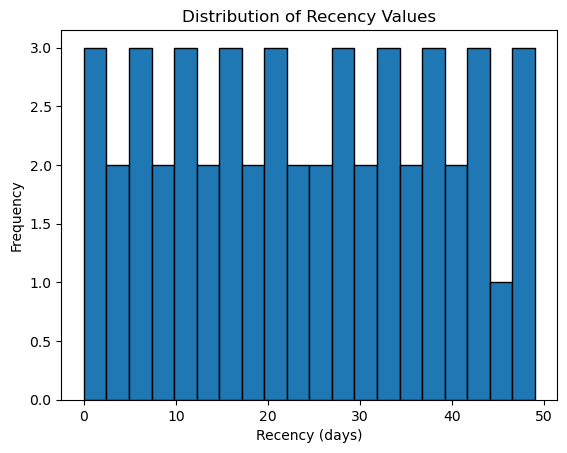

In [20]:
# check the distribution of the recency  values
recency_values = [8, 0, 17, 6, 7, 3, 12, 30, 20, 23, 5, 1, 14, 2, 9, 29, 44, 42, 16, 21, 19, 10, 27, 35, 45, 33, 31, 24, 37, 4, 34, 22, 13, 40, 28, 38, 36, 41, 15, 26, 25, 11, 18, 48, 43, 39, 32, 47, 49]

plt.hist(recency_values, bins=20, edgecolor='black')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Recency Values')
plt.show()

In [21]:
# calculate the median,mean, 25th percentile, and the 75th percentile. 
mean_ = np.mean(recency_values) 
median_ = np.median(recency_values) 
q1_ = np.percentile(recency_values, 25) 
q3_ = np.percentile(recency_values, 75) 


print(f"mean recency : {mean_}")
print(f"median recency : {median_}") 
print(f"1st Quartile : {q1_}") 
print(f"3rd Quartile : {q3_}") 

mean recency : 24.06122448979592
median recency : 24.0
1st Quartile : 12.0
3rd Quartile : 36.0


* Now form the statistical analysis done above, I have a descision to choose bewteen the 75th percentile (36.0) or the median (24)
* I am going to base the churn threshold on the median because it is easier to understand and implement, it has abalanced approach, and balanced sensitivity.

In [22]:
churn_threshold = 24 # I am going to work with a churn threshold of 24 days. 

# I am going to mark the customers with a higher recency value than the churn_thrshold (24) as churned . 
rfm['churn'] = (rfm['recency'] > churn_threshold)

rfm.head()

,customer_number,last_purchase_date,recency,frequency,spendings,churn
0,ID_000015,2022-03-23,8,16,229405.77,False
1,ID_000088,2022-03-31,0,28,563832.56,False
2,ID_000117,2022-03-14,17,1,68617.23,False
3,ID_000131,2022-03-25,6,4,277724.08,False
4,ID_000150,2022-03-24,7,9,282362.46,False


In [23]:
rfm

,customer_number,last_purchase_date,recency,frequency,spendings,churn
0,ID_000015,2022-03-23,8,16,229405.77,False
1,ID_000088,2022-03-31,0,28,563832.56,False
2,ID_000117,2022-03-14,17,1,68617.23,False
3,ID_000131,2022-03-25,6,4,277724.08,False
4,ID_000150,2022-03-24,7,9,282362.46,False
...,...,...,...,...,...,...
3392,ID_199795,2022-03-30,1,2,36294.69,False
3393,ID_199839,2022-03-31,0,2,95596.00,False
3394,ID_199840,2022-03-21,10,1,7688.19,False
3395,ID_199961,2022-03-13,18,2,24249.90,False


In [24]:
rfm['churn'].value_counts()

churn
False    2881
True      516
Name: count, dtype: int64

In [25]:
# merging the dataframe that contain the churn data back to the original dataframe. 
df_new = pd.merge(df, rfm[['customer_number', 'churn']], on= 'customer_number', how = 'left')
df_new.head(3)

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,churn
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,2022-03-28,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,2022-03-29,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,False
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,2022-03-28,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,2022-03-29,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,False
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,2022-03-28,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,2022-03-29,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,False


In [26]:
# I want perform label encoding on the categorical columns that are going to be useful in predicting churn 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_new['customer_group'] = le.fit_transform(df_new['customer_group']) 
df_new['territory'] = le.fit_transform(df_new['territory']) 
df_new['set_warehouse'] = le.fit_transform(df_new['set_warehouse']) 

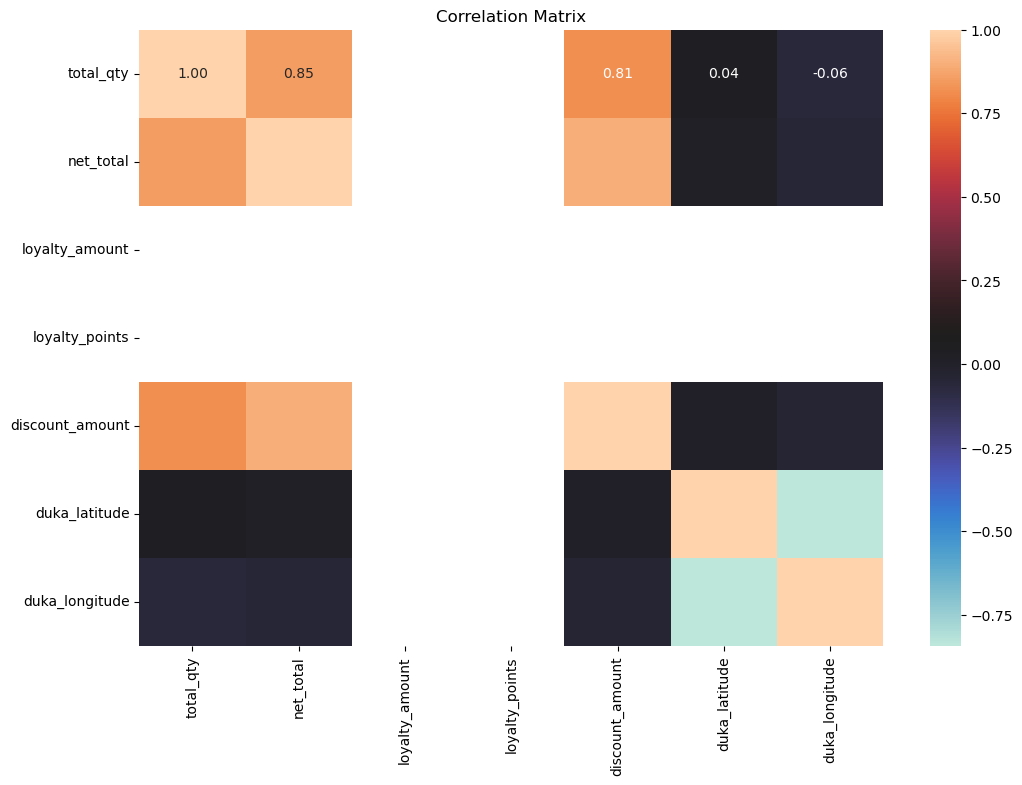

In [27]:
# Vizualization 

# correlation heatmap 
numerical_values = df.select_dtypes(include = ['number'])
plt.figure(figsize=(12,8)) 
sns.heatmap(numerical_values.corr(), annot=True, cmap='icefire', fmt='.2f') 
plt.title('Correlation Matrix')
plt.show()

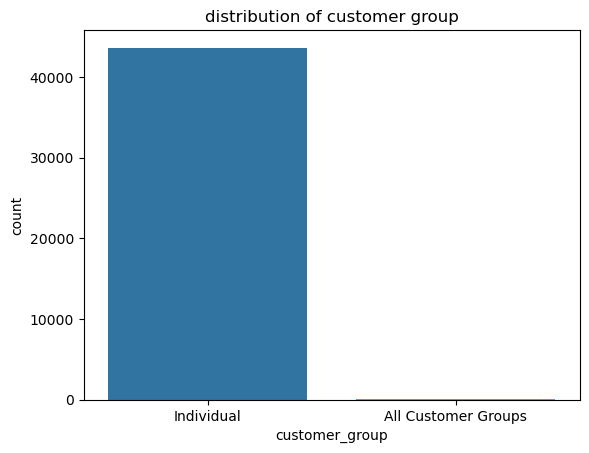

In [28]:
# distibution of the customer group 
sns.countplot(data = df, x = 'customer_group')
plt.title('distribution of customer group')
plt.show()

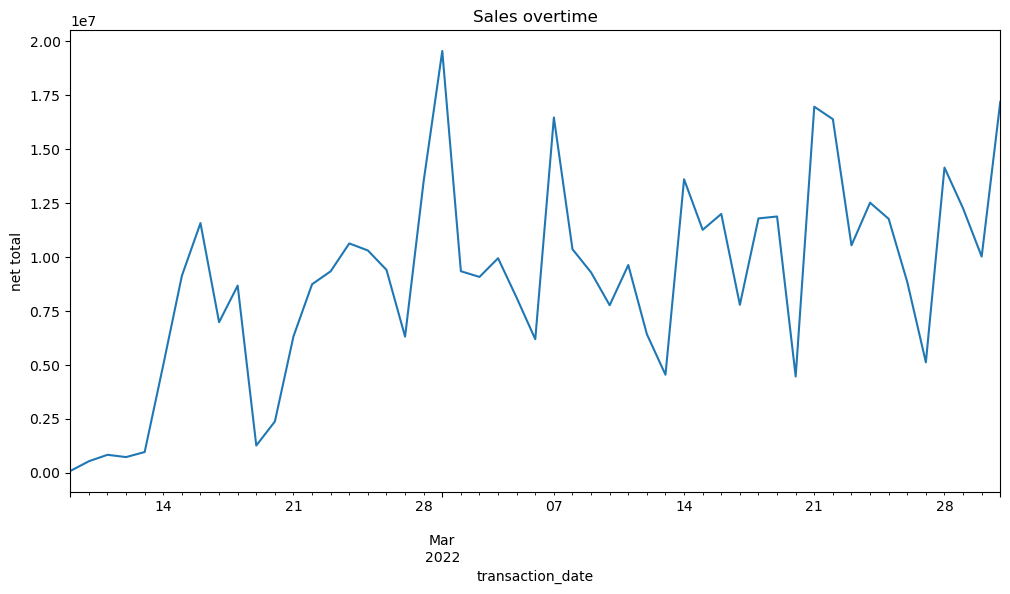

In [29]:
# the trend of sales over time 
df.groupby('transaction_date')['net_total'].sum().plot(figsize=(12,6))
plt.title('Sales overtime') 
plt.ylabel('net total')
plt.show()

In [30]:
# churn predictoion using the random forest model 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [31]:
X = df_new.drop(columns = ['customer_number', 'order_id', 'description', 'transaction_date', 'delivery_date', 'delivery_window_end_time', 'delivery_window_start_time', 'churn']) 
y = df_new['churn'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [33]:
#training the model 
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9871912168344007

In [36]:
confusion_matrix(y_test, y_pred)

array([[8336,    7],
       [ 105,  296]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      8343
        True       0.98      0.74      0.84       401

    accuracy                           0.99      8744
   macro avg       0.98      0.87      0.92      8744
weighted avg       0.99      0.99      0.99      8744



In [41]:
churn_results = pd.DataFrame({
    'customer_number': X_test.index,  # Assuming customer_number is the index
    'churn': y_pred
})

churn_results.head()

,customer_number,churn
0,17994,False
1,14792,True
2,37949,False
3,10849,False
4,12376,False


In [47]:
churn_results.churn.value_counts()

churn
False    8441
True      303
Name: count, dtype: int64

In [49]:
churn_results.to_csv('customer_churn_predictions.csv', index=False)